In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.9.0+cu126
0.24.0+cu126


In [2]:
from torch._C import NoneType
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_idx = train_data.class_to_idx
class_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"image shape: {image.shape} -> [color_channels, height, width]")
print(f"image label: {class_name[label]}")

image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
image label: Ankle boot


In [9]:
import matplotlib.pyplot as plt

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

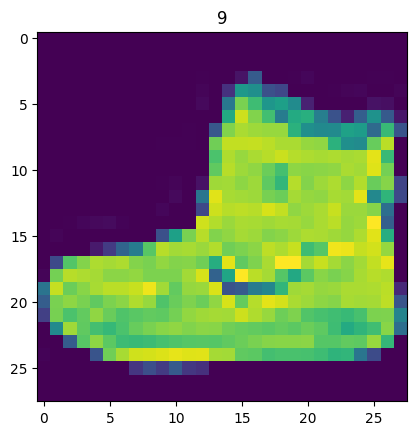

In [10]:
image,label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

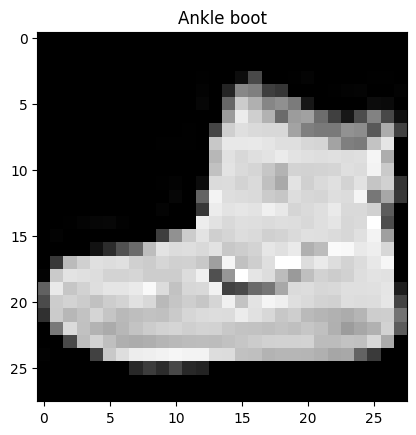

In [11]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_name[label])

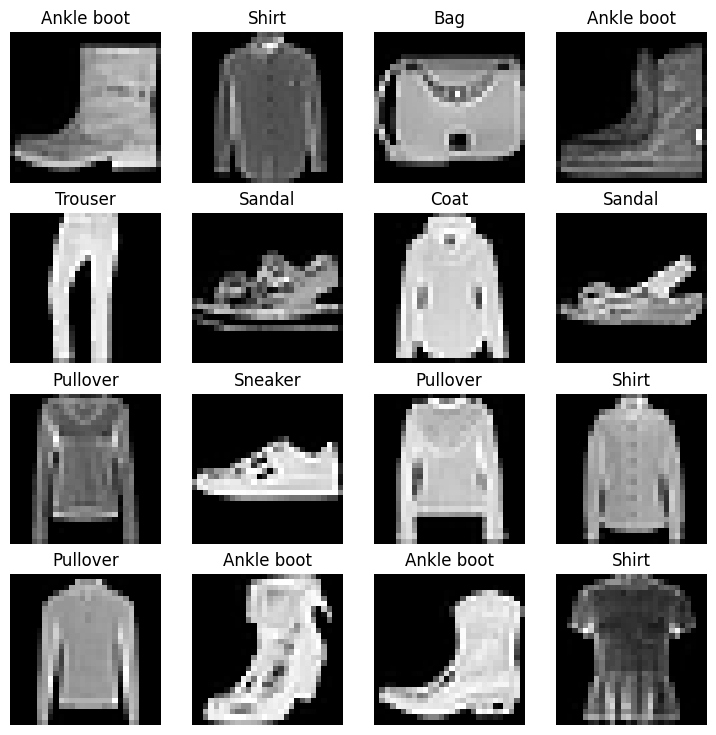

In [12]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,col = 4,4
for i in range(1,rows*col+1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,col,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_name[label])
  plt.axis(False);

In [13]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [15]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d9b145aa540>,
 <torch.utils.data.dataloader.DataLoader at 0x7d9b14848260>)

In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
label: 6, label size: torch.Size([])


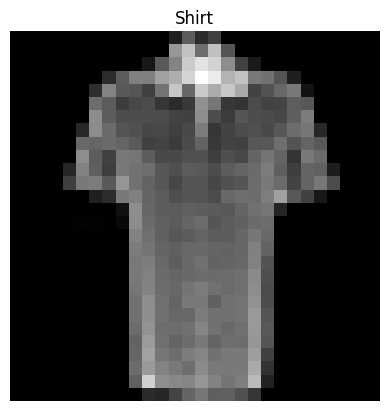

In [17]:
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size = [1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_name[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

In [18]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"shape before flatten: {x.shape} -> [color_channels, height, width]")
print(f"shape after flatten: {output.shape} -> [color_channels, height*width]")

shape before flatten: torch.Size([1, 28, 28]) -> [color_channels, height, width]
shape after flatten: torch.Size([1, 784]) -> [color_channels, height*width]


In [19]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_name)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [22]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download...')
else:
  print('Downloading helper_functions.py')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [23]:
from helper_functions import accuracy_fn

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [25]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):

  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [26]:
start_time = timer()
# some code
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device='cpu')


Train time on cpu: 0.000 seconds


4.496600013226271e-05

In [27]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  train_loss = 0
  for batch, (x,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(x)

    loss = loss_fn(y_pred,y)
    train_loss+=loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch%400==0:
      print(f"Looked at {batch*len(x)}/{len(train_dataloader.dataset)} samples.")

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      test_pred = model_0(x_test)

      test_loss += loss_fn(test_pred,y_test)

      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

trian_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                        end=trian_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 27.525 seconds


In [28]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device='cpu'):

  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      x,y = x.to(device),y.to(device)

      y_pred = model(x)

      loss += loss_fn(y_pred,y)
      acc+= accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
            'model_loss': loss.item(),
            'model_acc': acc}


model_0_results = eval_model(model=model_0,
                               data_loader = test_dataloader,
                               loss_fn = loss_fn,
                               accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [29]:
torch.cuda.is_available()

True

In [30]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [31]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [32]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_name)).to(device)

In [33]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [35]:
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device= device):

  train_loss,train_acc = 0,0
  model.train()

  for batch,(x,y) in enumerate(data_loader):
    x,y = x.to(device),y.to(device)

    y_pred = model(x)

    loss = loss_fn(y_pred,y)
    train_loss+=loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}%")


In [36]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):

  test_loss,test_acc =0,0

  model.eval()

  with torch.inference_mode():
    for x,y in data_loader:
      x,y = x.to(device),y.to(device)

      test_pred = model(x)

      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%\n")

In [37]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

trian_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=trian_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 1.0920 | Train acc: 61.3433%
Test loss: 0.9564 | Test acc: 64.9960%

Epoch: 1
-----
Train loss: 0.7810 | Train acc: 71.9283%
Test loss: 0.7223 | Test acc: 73.9117%

Epoch: 2
-----
Train loss: 0.6703 | Train acc: 75.9367%
Test loss: 0.6850 | Test acc: 75.0200%

Train time on cuda: 30.091 seconds


In [38]:
total_train_time_model_0

27.52493645300001

In [39]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [40]:
from torch.nn.modules import conv
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classfier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classfier(x)
    return x


In [41]:
image.shape

torch.Size([1, 28, 28])

In [42]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                    hidden_units=10,
                    output_shape=len(class_name)).to(device)

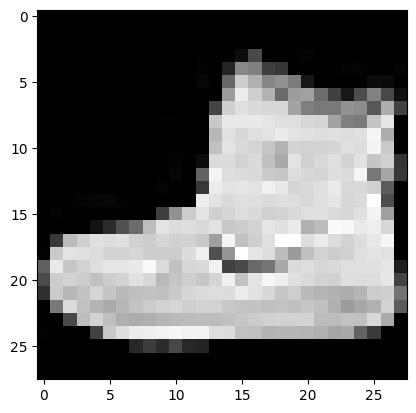

In [43]:
plt.imshow(image.squeeze(),cmap='gray')

In [44]:
rand_image_tensor = torch.randn(size=(1,28,28)).to(device)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [45]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [46]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"image shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f'test image:\n {test_image}')

image shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,

In [47]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [48]:
print(f"test image original shape: {test_image.shape}\n")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image)
print(f"test image shape after conv: {test_image_through_conv.shape}")

test_imqge_after_pool = max_pool_layer(test_image_through_conv)
print(f"test image shape after pool: {test_imqge_after_pool.shape}")

test image original shape: torch.Size([3, 64, 64])

test image shape after conv: torch.Size([10, 64, 64])
test image shape after pool: torch.Size([10, 32, 32])


In [49]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [50]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.5917 | Train acc: 78.4883%
Test loss: 0.3888 | Test acc: 86.0323%

Epoch: 1
-----
Train loss: 0.3621 | Train acc: 86.8433%
Test loss: 0.3558 | Test acc: 87.0507%

Epoch: 2
-----
Train loss: 0.3243 | Train acc: 88.2850%
Test loss: 0.3258 | Test acc: 88.2388%

Train time on cuda: 37.315 seconds


In [51]:
model_2_result = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_2_result

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3257858157157898,
 'model_acc': 88.2388178913738}

In [52]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [53]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_result])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.325786,88.238818


In [54]:
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,27.524936
1,FashionMNISTModelV1,0.685001,75.019968,30.090560
2,FashionMNISTModelV2,0.325786,88.238818,37.314633


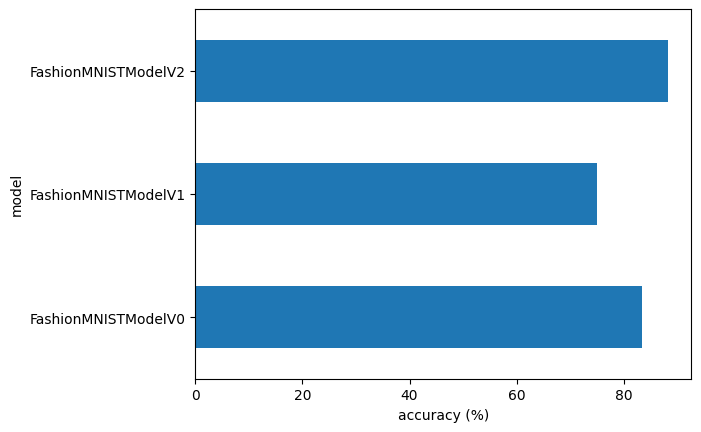

In [55]:
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model');

In [56]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [57]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

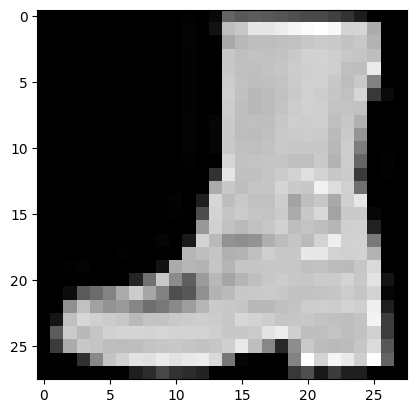

In [58]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')

In [59]:
pred_probs = make_predictions(model=model_2,
                            data=test_samples)
pred_probs[:2]

tensor([[4.3754e-06, 2.8586e-06, 1.0050e-06, 1.8756e-06, 1.3482e-05, 9.4620e-04,
         2.7304e-05, 3.2301e-05, 1.4523e-04, 9.9883e-01],
        [1.5324e-03, 7.6821e-06, 5.6761e-01, 2.4812e-04, 2.4989e-01, 6.6141e-07,
         1.8057e-01, 3.0291e-07, 1.3331e-04, 1.2507e-07]])

In [60]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 2, 7, 4, 4, 4, 4, 2, 2])

In [61]:
test_labels

[9, 6, 7, 4, 4, 2, 4, 2, 2]

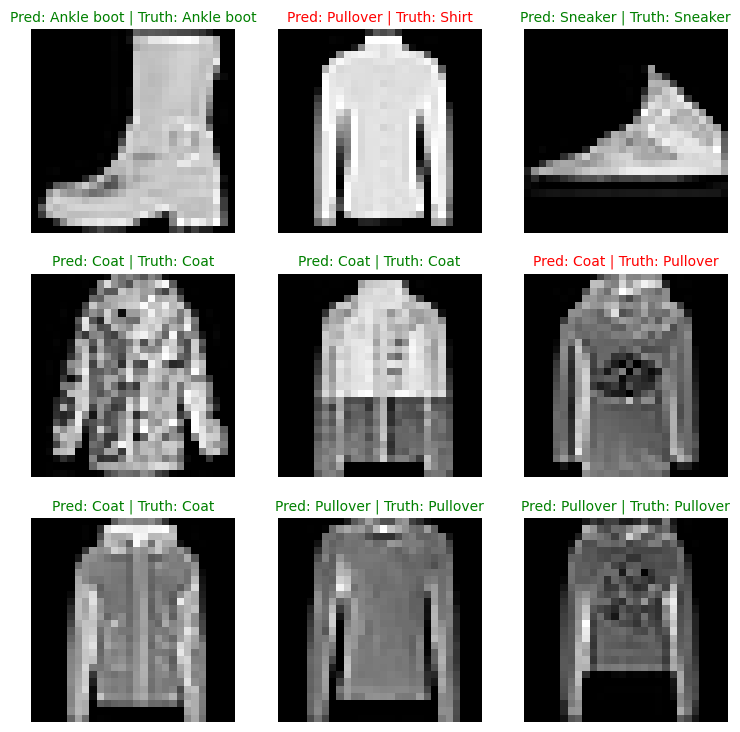

In [62]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap='gray')
  pred_label = class_name[pred_classes[i]]
  truth_label = class_name[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,color='green')
  else:
    plt.title(title_text,fontsize=10,c='r')
  plt.axis(False)

In [63]:
y_preds = []
model_2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader,desc="Making predictions..."):
    x,y = x.to(device),y.to(device)
    y_logit = model_2(x)
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [64]:
len(y_pred_tensor)

10000

In [65]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split('.')[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.24.0
mlxtend version: 0.24.0


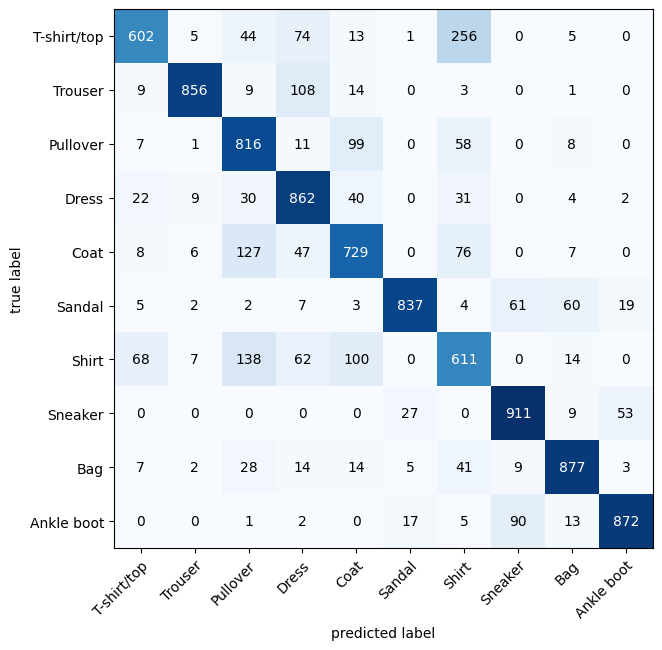

In [69]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_name),
                          task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                          target=test_data.targets)

fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    figsize=(10,7),
    class_names=class_name
)

In [68]:
confmat_tensor

tensor([[602,   5,  44,  74,  13,   1, 256,   0,   5,   0],
        [  9, 856,   9, 108,  14,   0,   3,   0,   1,   0],
        [  7,   1, 816,  11,  99,   0,  58,   0,   8,   0],
        [ 22,   9,  30, 862,  40,   0,  31,   0,   4,   2],
        [  8,   6, 127,  47, 729,   0,  76,   0,   7,   0],
        [  5,   2,   2,   7,   3, 837,   4,  61,  60,  19],
        [ 68,   7, 138,  62, 100,   0, 611,   0,  14,   0],
        [  0,   0,   0,   0,   0,  27,   0, 911,   9,  53],
        [  7,   2,  28,  14,  14,   5,  41,   9, 877,   3],
        [  0,   0,   1,   2,   0,  17,   5,  90,  13, 872]])

In [70]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [71]:
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                  hidden_units=10,
                                  output_shape=len(class_name))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [73]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3257858157157898,
 'model_acc': 88.2388178913738}

In [74]:
torch.isclose(torch.tensor(model_2_result['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-02)

tensor(True)